In [3]:
from plotnine import * # paquete equivalente a ggplot de R
from sklearn.preprocessing import LabelEncoder #codificación de variables categóricos a números correlativos
import requests #para poder obtener el código en html
from bs4 import BeautifulSoup# paquete para poder parsear y tratar datos extraídos de html
import numpy as np #paquete para aplicar operaciones matemáticas
import pandas as pd# paquete para tratar datos en formato dataframe

# Visualización: Práctica 2 Gráficos con ggplot2

1. Utilizar la librería ggplot o su equivalente plotnine para realizar los siguientes gráficos sobre los Precios de productos agrícolas de Canarias:
    - Gráfico de dispersión de los precios de al menos 4 cultivos.
    - Gráfico de la evolución de la media mensual de precios de 4 cultivos en cada una de las islas.
    - Distribución de los precios de 4 cultivos en todas las islas.
2. Realizar un análisis exploratorio de datos basado en gráficos del dataset de Tráfico Marítimo utilizando la librería ggplot2 o su equivalente plotnine para python.

En esta práctica vamos a aplicar la gramática de gráficos de Wickham, la cual consiste en construir un gráfico de con una serie de pasos establecidos, los cuales iremos explicando en cada visualización.

In [4]:
# Cargamos el dataset
# ===========================================================
# df = pd.read_csv('/content/drive/MyDrive/2.- Máster Ciberseguridad y ciencia de datos/13_Visualización/Practica_2/Precios_2019_20.csv', encoding="unicode-escape",  sep = ';', on_bad_lines='skip')
# df = pd.read_csv('/content/drive/MyDrive/2.- Máster Ciberseguridad y ciencia de datos/13_Visualización/Practica_2/Precios_2019_20.csv',   sep = ';', on_bad_lines='skip')
df = pd.read_csv('/content/drive/MyDrive/2.- Máster Ciberseguridad y ciencia de datos/13_Visualización/Practica_2/Precios_2019_20.csv',   sep = ';', on_bad_lines='skip')

df.head(10)

,Zona,Cultivo,Año,Mes,Precio
0,CANARIAS,Aguacate,2016,Enero,1.89
1,CANARIAS,Aguacate,2016,Febrero,1.97
2,CANARIAS,Aguacate,2016,Marzo,1.93
3,CANARIAS,Aguacate,2016,Abril,2.09
4,CANARIAS,Aguacate,2016,Mayo,2.42
5,CANARIAS,Aguacate,2016,Junio,2.88
6,CANARIAS,Aguacate,2016,Julio,3.36
7,CANARIAS,Aguacate,2016,Agosto,3.72
8,CANARIAS,Aguacate,2016,Septiembre,3.18
9,CANARIAS,Aguacate,2016,Octubre,1.87


In [5]:
# Observamos los valores únicos de las variables categóricas
# ===========================================================
print(df['Zona'].unique())
print(df['Cultivo'].unique())
print(df['Año'].unique())
print(df['Mes'].unique())

['CANARIAS' 'Gran_Canaria' 'Tenerife' 'La_Palma']
['Aguacate' 'Bata/Boniato' 'Berenjena' 'Berro' 'Br¾coli/BrÚcol' 'Bubango'
 'CalabacÝn' 'Calabaza' 'Cebolla' 'Cebolleta' 'Col' 'Coliflor' 'Fresa'
 'JudÝa_Verde' 'Lechuga/achicoria' 'Lim¾n' 'Mango' 'Mel¾n' 'Naranja'
 'Papa' 'Papaya' 'Pepino' 'Pimiento' 'Pi±a(Ananßs)' 'Pi±a_de_millo/maÝz'
 'Plßtano' 'Puerro' 'SandÝa' 'Tomate' 'Zanahoria' 'Uva']
[2016 2017 2018 2019]
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


In [6]:
# Reemplazamos aquellos registros que no está correctamente escritos 
# por los correctos
# ===========================================================

df= df.replace(['CalabacÝn','JudÝa_Verde', 'Lim¾n', 'Mel¾n', 'Pi±a(Ananßs)', 'Pi±a_de_millo/maÝz','Plßtano', 'SandÝa','Br¾coli/BrÚcol'],
           ['Calabacín', 'Judia_Verde', 'Limón','Melón', 'Piña', 'Piña_de_millo/maíz', 'Plátano', 'Sandía','Brócoli'])

# Comprobamos que ahora si están correctamente escritos
# ===========================================================
print(df['Zona'].unique())
print(df['Cultivo'].unique())
print(df['Año'].unique())
print(df['Mes'].unique())

['CANARIAS' 'Gran_Canaria' 'Tenerife' 'La_Palma']
['Aguacate' 'Bata/Boniato' 'Berenjena' 'Berro' 'Brócoli' 'Bubango'
 'Calabacín' 'Calabaza' 'Cebolla' 'Cebolleta' 'Col' 'Coliflor' 'Fresa'
 'Judia_Verde' 'Lechuga/achicoria' 'Limón' 'Mango' 'Melón' 'Naranja'
 'Papa' 'Papaya' 'Pepino' 'Pimiento' 'Piña' 'Piña_de_millo/maíz' 'Plátano'
 'Puerro' 'Sandía' 'Tomate' 'Zanahoria' 'Uva']
[2016 2017 2018 2019]
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


In [ ]:
# Reemplazamos todos los valores nulos por el valor 0
# ===========================================================
df= df.replace(['...', '....','..','.'],
           [0,0,0,0])

# Convertimos la variable Precio en numérica para poderla tratar
# ===========================================================
df['Precio'] = pd.to_numeric(df['Precio'])

In [ ]:
# Convertimos la variable Precio en numérica para poderla tratar
# ===========================================================
df['Precio'] = pd.to_numeric(df['Precio'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828 entries, 0 to 5827
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zona     5828 non-null   object 
 1   Cultivo  5828 non-null   object 
 2   Año      5828 non-null   int64  
 3   Mes      5828 non-null   object 
 4   Precio   5828 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 227.8+ KB


In [ ]:
df_reduced = df[(df['Zona'] == 'CANARIAS') & ((df['Cultivo'] == 'Papaya') | (df['Cultivo'] == 'Fresa') | (df['Cultivo'] == 'Aguacate'))].sort_values(by = 'Año', ascending =True).iloc[:, [0,1,2,4]].reset_index(drop = True)
df_reduced.groupby(['Año','Cultivo']).mean()
# df_reduced.to_csv('/content/drive/MyDrive/2.- Máster Ciberseguridad y ciencia de datos/13_Visualización/dataframe_puertos_tenerife_2.csv', index=False)


Precio
Año  Cultivo           
2016 Aguacate  2.369167
     Fresa     3.525833
     Papaya    0.730000
2017 Aguacate  2.472500
     Fresa     3.890833
     Papaya    0.887500
2018 Aguacate  2.879167
     Fresa     3.610000
     Papaya    1.071667
2019 Aguacate  2.490909
     Fresa     3.107273
     Papaya    0.888182

In [ ]:
test = pd.DataFrame({'Año': [2016,2016,2016, 2017,2017,2017,2018,2018,2018,2019,2019,2019],
                     'Cultivo':['Aguacate', 'Fresa', 'Papaya','Aguacate', 'Fresa', 'Papaya','Aguacate', 'Fresa', 'Papaya','Aguacate', 'Fresa', 'Papaya'],
                     'Precio': df_reduced.groupby(['Año','Cultivo']).mean().Precio.reset_index(drop = True)})
test.to_csv('/content/drive/MyDrive/2.- Máster Ciberseguridad y ciencia de datos/13_Visualización/dataframe_4_cultivos.csv', index=False)
test

,Año,Cultivo,Precio
0,2016,Aguacate,2.369167
1,2016,Fresa,3.525833
2,2016,Papaya,0.730000
3,2017,Aguacate,2.472500
4,2017,Fresa,3.890833
5,2017,Papaya,0.887500
6,2018,Aguacate,2.879167
7,2018,Fresa,3.610000
8,2018,Papaya,1.071667
9,2019,Aguacate,2.490909


## 1.1 Gráfico de dispersión de los precios de al menos 4 cultivos.

##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos
- Mapeamos las variables Limón, Melón, Naranja y Papaya con estética de diferentes colores y añadimos la leyenda para cada cultivo. También  mapeamos la variable Zona como eje y y la variable Precio como el eje X.
- Seleción de scatterplot para dispersión de valores utilizando geom_point.
- Utilización de la capa facet_wrap para cambiar datos de 1D a 2D y poder dedicar una gráfica a cada Cultivo
- Utilización de la capa labs para añadir Título al gráfico

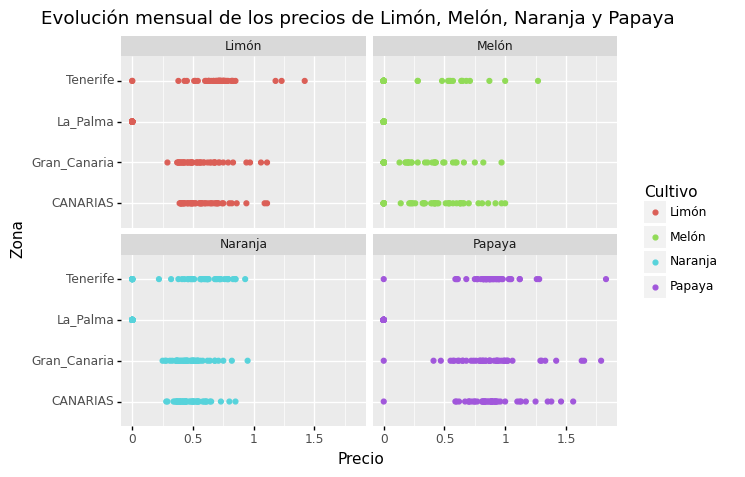

<ggplot: (87790843766)>

In [ ]:
# Realizamos el gráfico de dispersión de cuatro cultivos
# ===========================================================

(ggplot(df[(df['Cultivo'] == 'Naranja') | (df['Cultivo'] == 'Limón')
          | (df['Cultivo'] == 'Melón') | (df['Cultivo'] == 'Papaya')], 
        aes('Precio', 'Zona', color='Cultivo'))
 + geom_point()
 + facet_wrap('~Cultivo')
 + labs(title='Distribución de los precios de Limón, Melón, Naranja y Papaya '))

###### Conclusiones
Observamos que en la Palma no existe ningún dato de precio de los cultivos elegidos. En general la papaya tiene un precio más elevado aunque posee cierta dispersión, al igual que el melón. La naranja posee un precio bastante concentrado alrededor del 0,5.

## 2.1 Gráfico de la evolución de la media mensual de precios de 4 cultivos en cada una de las islas.

In [ ]:
# generamos una nueva columna con un formato fecha para facilitar su visualización
# ===========================================================
days = np.ones(len(df), dtype = int)
df['Día'] = days
df_p = df.copy()
df_p['mes'] = df_p['Mes']
df_p['mes'] = df_p['mes'].replace(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], np.arange(1,13))

df_p['Fecha'] = df_p['Año'].astype(str) + '-' + df_p['mes'].astype(str) + '-'+ df_p['Día'].astype(str)

df_p['Fecha'] = pd.to_datetime(df_p['Fecha'],yearfirst = True )


df_p.head()

,Zona,Cultivo,Año,Mes,Precio,Día,mes,Fecha
0,CANARIAS,Aguacate,2016,Enero,1.89,1,1,2016-01-01
1,CANARIAS,Aguacate,2016,Febrero,1.97,1,2,2016-02-01
2,CANARIAS,Aguacate,2016,Marzo,1.93,1,3,2016-03-01
3,CANARIAS,Aguacate,2016,Abril,2.09,1,4,2016-04-01
4,CANARIAS,Aguacate,2016,Mayo,2.42,1,5,2016-05-01


##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos y utilizamos la nueva variable Fecha
- Mapeamos los atributos Aguacuate, Papa, Pepino y Zanahoria, con estética de diferentes colores y añadimos la leyenda para cada cultivo. También  mapeamos la variable Fecha como eje Y y la variable Precio con el eje X.
- Seleción de geom_point para el dibujado de gráfico de líneas y ver de mejor forma la evolución de los datos 
- Utilziación de la capa Theme para modificar las etiquetas del eje x y poderlas rotar a 90º, así como así como también poder ajustar el ratio Altura/Anchura.
- Utilización de la capa facet_wrap para cambiar datos de 1D a 2D y poder dedicar una gráfica a cada Cultivo.
- Utilización de la capa labs para añadir Título al gráfico

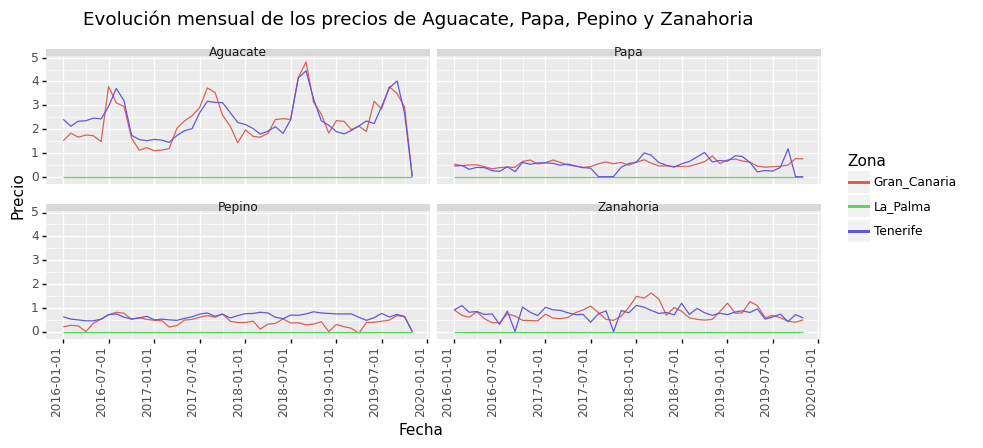

<ggplot: (87791455738)>

In [ ]:
# https://stackoverflow.com/questions/47714540/plotnine-rotating-labels

# generamos la visulalización utilizando las diferentes capas de 
# ggplot
# ===========================================================

(ggplot(df_p[((df_p['Cultivo'] == 'Pepino') | (df_p['Cultivo'] == 'Zanahoria')
          | (df_p['Cultivo'] == 'Papa') | (df_p['Cultivo'] == 'Aguacate')) & (df_p['Zona'] != 'CANARIAS')], 
       aes('Fecha', 'Precio', color='Zona'))
 + geom_line()
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3)
 + facet_wrap('~Cultivo')
 + labs(title='Evolución mensual de los precios de Aguacate, Papa, Pepino y Zanahoria '))


###### Conclusiones
De nuevo no tenemos datos de La Palma para los cultivos elegidos. Destaca el comportamiento cíclico del precio del Aguacate, además de cuando está al alza y cuando está la baja, siendo verano la peor época para comprar e invierno la mejor.

## 3. Distribución de los precios de 4 cultivos en todas las islas.

##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos y utilizamos la nueva.
- Mapeamos la variable Zona, con estética de diferentes colores y añadimos la leyenda para cada cultivo. También  mapeamos la variable Precio como eje Y y la variable Cultivo con el eje X.
- Seleción de geom_boxplot para la visualización de la distribución de valores del precio
- Utilización de la capa labs para añadir Título al gráfico

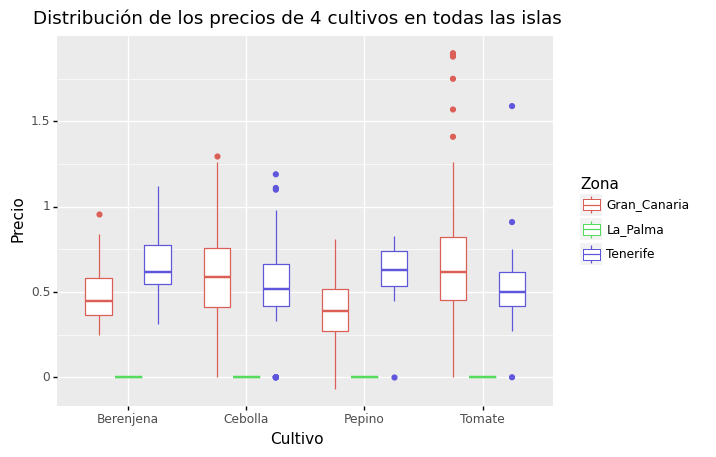

<ggplot: (87791853565)>

In [ ]:
(ggplot(df[((df['Cultivo'] == 'Cebolla') | (df['Cultivo'] == 'Pepino')
          | (df['Cultivo'] == 'Tomate') | (df['Cultivo'] == 'Berenjena')) & (df['Zona'] != 'CANARIAS')], 
        aes('Cultivo', 'Precio', color='Zona'))
 + geom_boxplot()
 + labs(title='Distribución de los precios de 4 cultivos en todas las islas'))

##### Conclusiones
La Palma no cuenta con los cultivos seleccionados. Llama la atención la diferencia de precio que puede alcanzar el tomate entre las dos islas capitalinas, así como la dispersión.

## 2.  Datos de los puertos de España
Realizar un análisis exploratorio de datos basado en gráficos.del dataset de Tráfico Marítimo utilizando la librería ggplot2 o su equivalente plotnine para python. A continuación indicamos una descripción del propio INE para las variables:
- Toneladas cargadas y descargadas de graneles líquidos: Las transportadas por un buque en el mes de referencia. Los graneles líquidos son mercancías que no van envasadas o empaquetadas y cuyo cargamento completo se considere una unidad. Se cargan y descargan por tubería.
- Toneladas cargadas y descargadas de graneles sólidos: Las transportadas por un buque en el mes de referencia. Los graneles sólidos son mercancías que no van envasadas o empaquetadas y cuyo cargamento completo se considere una unidad. Se cargan y descargan con grúas de cuchara o por medios específicos, generalmente de gran capacidad.
- Toneladas cargadas y descargadas de mercancía general: Las transportadas por un buque en el mes de referencia. La mercancía general son mercancías que van envasadas o empaquetadas. Se cargan y descargan con grúas.
- Toneladas descargadas de pesca fresca: Las descargadas por buques pesqueros, directamente a la lonja pesquera para su subasta, en el mes de referencia.
- Toneladas cargadas de avituallamiento de productos petrolíferos: Las cargadas por los buques, en el mes de referencia, como combustible.
- Toneladas cargadas de otros avituallamientos: Las cargadas por los buques, en el mes de referencia, necesarias para la navegación del buque y su vida en él, tales como víveres, agua potable, hielo, lubricantes, pertrechos, etc.
- Número de contenedores cargados y descargados: Los transportados por buques portacontenedores en el mes de referencia. Se cargan y descargan con grúas especiales.
- Número de TEUS cargados y descargados: Los transportados por buques portacontenedores en el mes de referencia. Se cargan y descargan con grúas especiales. Un TEU equivale a un contenedor de 20 pies. 


In [7]:
# Realizamos el request a la página de Puertos del Estado
# ===========================================================
r = requests.get('https://www.puertos.es/es-es/estadisticas/Paginas/estadistica_Historicas.aspx')
 
# Parseamos todo el texto html
# ===========================================================
soup = BeautifulSoup(r.content, 'html.parser')

# Después de inspeccionar en la propia página, observamos que los datos 
# que queremos están almacenados en un elemento de la clase table.
# Buscamos ese elemento que además tiene un nombre asignado.
# ===========================================================

file = BeautifulSoup(r.text, "lxml")
find_table = file.find('table', class_='table-responsive')

# Almacenamos todas las filas que contengan la cabecera tr
# ===========================================================
rows = find_table.find_all('tr')

# Extraemos de cada rows, todos los elementos que contiene,en princpio,
# 11 elementos por cada fila, y los vamos almacenando en una lista
# data
# ===========================================================
data = []
table_data = []
for i in rows:
    table_data = i.find_all('td')
    data = np.append(data, [j.text for j in table_data])
    
    
# Empaquetamos los datos en paquetes de 11 elementos, ya que sabemos 
# que hay 11 variables
# ===========================================================
# https://datagy.io/python-split-list-into-chunks/

# Split a Python List into Chunks using itertools
# Separamos nuestra lista en bloques de 11 usando itertools
# ===========================================================
from itertools import zip_longest
# our_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
chunk_size = 11
chunked_list = list(zip_longest(*[iter(data)]*chunk_size, fillvalue=' '))
# print(chunked_list)
# Returns: [(1, 2, 3), (4, 5, 6), (7, 8, 9), (10, 11, '')]
chunked_list = [list(item) for item in list(zip_longest(*[iter(data)]*chunk_size, fillvalue=' '))]
# print(chunked_list)
# Returns: [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]

# Creamos nuestro dataset con las variables y los datos parseados
# ===========================================================

df_puertos = pd.DataFrame(data=chunked_list, columns=['Año', 'Autoridad Portuaria', 'Graneles Líquidos', 'Graneles Sólidos', 'Mercancía General', 'Pesca Fresca', 'Avitua- llamiento', 'Tráfico Local', 'TOTAL TRAFICO', 'TEUS', 'Buques'])
df_puertos.head()

,Año,Autoridad Portuaria,Graneles Líquidos,Graneles Sólidos,Mercancía General,Pesca Fresca,Avitua- llamiento,Tráfico Local,TOTAL TRAFICO,TEUS,Buques
0,2009,A Coruña ...,6.820.497,3.215.589,1.460.292,43.108,93.570,283.941,11.916.997,7.778,1.231
1,2009,Alicante ...,114.588,1.111.169,1.260.064,511,24.400,3,2.510.735,132.059,935
2,2009,Almería ...,1.502,3.291.672,542.994,4.037,117.334,0,3.957.539,1.425,1.999
3,2009,Avilés ...,673.268,2.293.135,984.041,13.590,35.981,0,4.000.015,2.575,700
4,2009,Bahía de Algeciras ...,20.142.781,1.743.479,42.316.996,2.168,3.375.642,2.329.889,69.910.955,3.043.268,24.852


In [17]:
# Eliminamos la última fila ya que es un valor calculado de todas las variables
# ===========================================================
df_puertos = df_puertos.drop(index = 1372, axis = 1)

In [18]:
# Realizamos un análisis exploratorio de nulos, tipo de datos y 
# cantidad de registros
# ===========================================================
df_puertos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1371
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  1372 non-null   object
 1   Autoridad Portuaria  1372 non-null   object
 2   Graneles Líquidos    1372 non-null   object
 3   Graneles Sólidos     1372 non-null   object
 4   Mercancía General    1372 non-null   object
 5   Pesca Fresca         1372 non-null   object
 6   Avitua- llamiento    1372 non-null   object
 7   Tráfico Local        1372 non-null   object
 8   TOTAL TRAFICO        1372 non-null   object
 9   TEUS                 1372 non-null   object
 10  Buques               1372 non-null   object
dtypes: object(11)
memory usage: 128.6+ KB


In [19]:
# Observamos los valores úniqos de la única variable categórica
# ===========================================================
df_puertos.columns

Index(['Año', 'Autoridad Portuaria', 'Graneles Líquidos', 'Graneles Sólidos',
       'Mercancía General', 'Pesca Fresca', 'Avitua- llamiento',
       'Tráfico Local', 'TOTAL TRAFICO', 'TEUS', 'Buques'],
      dtype='object')

In [20]:
###### para poder covertir los valores a numéricos, se deben cambiar los . por ,
# https://note.nkmk.me/en/python-str-num-conversion/

# Convertimos los valores a numéricos. Para ello se deben cambiar 
# los . por , ya que sino da problemas de conversión
# ===========================================================

labels = ['Año','Graneles Líquidos', 'Graneles Sólidos',
       'Mercancía General', 'Pesca Fresca', 'Avitua- llamiento',
       'Tráfico Local', 'TOTAL TRAFICO', 'TEUS', 'Buques']

for a in labels:
    for i,x in enumerate(df_puertos[a]):
        df_puertos[a][i] = df_puertos[a][i].replace('.','')

for a in labels:
    df_puertos[a] = pd.to_numeric(df_puertos[a])
        
df_puertos.head()

,Año,Autoridad Portuaria,Graneles Líquidos,Graneles Sólidos,Mercancía General,Pesca Fresca,Avitua- llamiento,Tráfico Local,TOTAL TRAFICO,TEUS,Buques
0,2009,A Coruña ...,6820497,3215589,1460292,43108,93570,283941,11916997,7778,1231
1,2009,Alicante ...,114588,1111169,1260064,511,24400,3,2510735,132059,935
2,2009,Almería ...,1502,3291672,542994,4037,117334,0,3957539,1425,1999
3,2009,Avilés ...,673268,2293135,984041,13590,35981,0,4000015,2575,700
4,2009,Bahía de Algeciras ...,20142781,1743479,42316996,2168,3375642,2329889,69910955,3043268,24852


In [21]:
# Observamos que cada atributo de la variable Autoridad Portuaria 
# tiene asignado una serie de espacios hasta llegar a 100.
# ===========================================================
df_puertos['Autoridad Portuaria'].unique()

array(['A Coruña                                                                                            ',
       'Alicante                                                                                            ',
       'Almería                                                                                             ',
       'Avilés                                                                                              ',
       'Bahía de Algeciras                                                                                  ',
       'Bahía de Cádiz                                                                                      ',
       'Baleares                                                                                            ',
       'Barcelona                                                                                           ',
       'Bilbao                                                                                              ',
 

In [22]:
# Eliminamos todos esos espacios
# ===========================================================
df_puertos = df_puertos.replace(['A Coruña                                                                                            ',
       'Alicante                                                                                            ',
       'Almería                                                                                             ',
       'Avilés                                                                                              ',
       'Bahía de Algeciras                                                                                  ',
       'Bahía de Cádiz                                                                                      ',
       'Baleares                                                                                            ',
       'Barcelona                                                                                           ',
       'Bilbao                                                                                              ',
       'Cartagena                                                                                           ',
       'Castellón                                                                                           ',
       'Ceuta                                                                                               ',
       'Ferrol-S. Cibrao                                                                                    ',
       'Gijón                                                                                               ',
       'Huelva                                                                                              ',
       'Las Palmas                                                                                          ',
       'Málaga                                                                                              ',
       'Marín y Ría de Pontevedra                                                                           ',
       'Melilla                                                                                             ',
       'Motril                                                                                              ',
       'Pasaia                                                                                              ',
       'Santa Cruz de Tenerife                                                                              ',
       'Santander                                                                                           ',
       'Sevilla                                                                                             ',
       'Tarragona                                                                                           ',
       'Valencia                                                                                            ',
       'Vigo                                                                                                ',
       'Vilagarcía                                                                                          ',
       'Almería-Motril                                                                                      ',
       'C.A.G.P                                                                                             ',
       'Puerto Sta. María                                                                                   ',
       'San Esteban de Pravia                                                                               '],['A Coruña',
       'Alicante',
       'Almería ',
       'Avilés',
       'Bahía de Algeciras',
       'Bahía de Cádiz',
       'Baleares',
       'Barcelona',
       'Bilbao',
       'Cartagena',
       'Castellón',
       'Ceuta ',
       'Ferrol-S. Cibrao  ',
       'Gijón',
       'Huelva',
       'Las Palmas',
       'Málaga',
       'Marín y Ría de Pontevedra',
       'Melilla',
       'Motril',
       'Pasaia',
       'Santa Cruz de Tenerife',
       'Santander',
       'Sevilla',
       'Tarragona',
       'Valencia',
       'Vigo',
       'Vilagarcía',
       'Almería-Motril',
       'C.A.G.P',
       'Puerto Sta. María',
       'San Esteban de Pravia'])

In [23]:
# Comprobamos que ahora los datos están correctos
# ===========================================================
df_puertos['Autoridad Portuaria'].unique()

array(['A Coruña', 'Alicante', 'Almería ', 'Avilés', 'Bahía de Algeciras',
       'Bahía de Cádiz', 'Baleares', 'Barcelona', 'Bilbao', 'Cartagena',
       'Castellón', 'Ceuta ', 'Ferrol-S. Cibrao  ', 'Gijón', 'Huelva',
       'Las Palmas', 'Málaga', 'Marín y Ría de Pontevedra', 'Melilla',
       'Motril', 'Pasaia', 'Santa Cruz de Tenerife', 'Santander',
       'Sevilla', 'Tarragona', 'Valencia', 'Vigo', 'Vilagarcía',
       'Almería-Motril', 'C.A.G.P', 'Puerto Sta. María',
       'San Esteban de Pravia'], dtype=object)

In [24]:
# Comprobamos que cada variable es del tipo correcto
# ===========================================================
df_puertos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1371
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  1372 non-null   int64 
 1   Autoridad Portuaria  1372 non-null   object
 2   Graneles Líquidos    1372 non-null   int64 
 3   Graneles Sólidos     1372 non-null   int64 
 4   Mercancía General    1372 non-null   int64 
 5   Pesca Fresca         1372 non-null   int64 
 6   Avitua- llamiento    1372 non-null   int64 
 7   Tráfico Local        1372 non-null   int64 
 8   TOTAL TRAFICO        1372 non-null   int64 
 9   TEUS                 1372 non-null   int64 
 10  Buques               1372 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 160.9+ KB


In [25]:
# Realizamos un análisis exploratorio de los datos más en profundidad
# ===========================================================
df_puertos.describe(include='all')

,Año,Autoridad Portuaria,Graneles Líquidos,Graneles Sólidos,Mercancía General,Pesca Fresca,Avitua- llamiento,Tráfico Local,TOTAL TRAFICO,TEUS,Buques
count,1372.000000,1372,1.372000e+03,1.372000e+03,1.372000e+03,1372.000000,1.372000e+03,1.372000e+03,1.372000e+03,1.372000e+03,1372.000000
unique,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1984.970845,NaN,3.645034e+06,2.202145e+06,2.283577e+06,30173.696793,3.054699e+05,1.175232e+05,8.583922e+06,1.201913e+05,3656.695335
std,13.890287,NaN,5.079657e+06,2.719275e+06,5.271746e+06,61078.629092,5.097211e+05,4.286656e+05,9.913718e+06,3.970353e+05,4223.259242
min,1962.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.592100e+04,0.000000e+00,3.000000
25%,1973.000000,NaN,2.214692e+05,3.590658e+05,3.337100e+05,2869.750000,5.115150e+04,0.000000e+00,2.390466e+06,0.000000e+00,1137.750000
50%,1985.000000,NaN,1.054674e+06,1.222728e+06,7.289905e+05,8286.500000,1.163985e+05,0.000000e+00,4.978488e+06,2.590000e+03,1872.000000
75%,1997.000000,NaN,6.063759e+06,3.025084e+06,1.797836e+06,20585.750000,2.904092e+05,1.948800e+04,1.170393e+07,5.826875e+04,4432.750000


In [26]:
# df_puertos.to_csv('/content/drive/MyDrive/2.- Máster Ciberseguridad y ciencia de datos/13_Visualización/dataframe_puertos.csv', index=False)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df_puertos_tenerife = df_puertos[df_puertos['Autoridad Portuaria'] == 'Santa Cruz de Tenerife'].sort_values(by = 'Año', ascending =True).iloc[:,[5,8, 0]].reset_index(drop = True)
df_puertos_tenerife = df_puertos_tenerife.rename(columns = {'Pesca Fresca':'fresh_fish', 'Año': 'year', 'TOTAL TRAFICO':'total_traffic'})
# df_puertos_tenerife.to_csv('/content/drive/MyDrive/2.- Máster Ciberseguridad y ciencia de datos/13_Visualización/dataframe_puertos_tenerife_2.csv', index=False)
df_puertos_tenerife.head(5)

,fresh_fish,total_traffic,year
0,14018,9398330,1962
1,17643,11179359,1963
2,22759,11990571,1964
3,23934,13791457,1965
4,19667,14135454,1966


##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos.
- Mapeo de la variable Pesca Fresca para el eje Y con estñética de colores indicando el color de cada tipo de atributo y añadimos la leyenda para cada Autoridad Portuaria filtrada. Definimos el eje X con la variable Año.
- Seleción de geom_line para el dibujado de gráfico de líneas y ver de mejor forma la evolución de los datos
- Utilización de la capa labs para añadir Título al gráfico

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


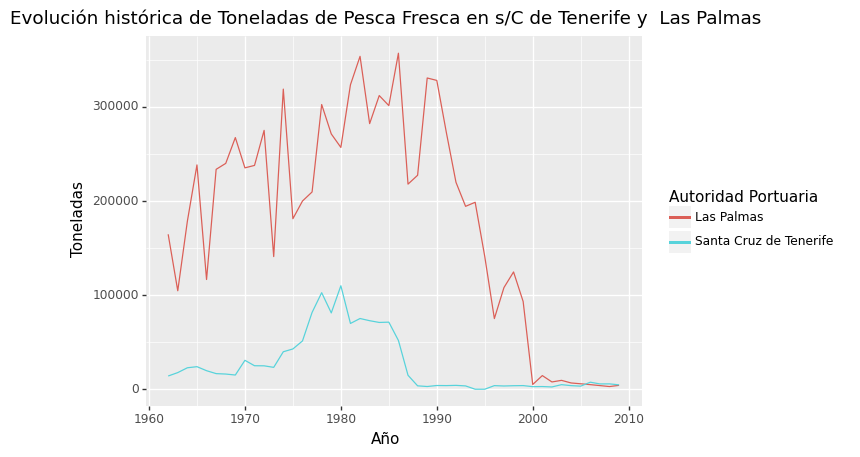

<ggplot: (8752366196489)>

In [29]:
# Realizamos una comparativa de toneladas descargadas de Pesca 
# entre Tenerife y Las Palmas
# ===========================================================
(ggplot(df_puertos[(df_puertos['Autoridad Portuaria'] == 'Santa Cruz de Tenerife') | (df_puertos['Autoridad Portuaria'] == 'Las Palmas')
          ], 
        aes('Año','Pesca Fresca', color='Autoridad Portuaria'))
 + geom_line()
 + labs(title='Evolución histórica de Toneladas de Pesca Fresca en s/C de Tenerife y  Las Palmas', y='Toneladas'))

###### Conclusiones
Observamos que el puerto de Las Palmas mueve muchas más toneladas de Pescado Fresco que su isla vecina. De hecho, como veremos posteriormente, a nivel nacional es de los que más.

##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos cuyo valor es superior a 20000 toneladas.
- Mapeo de variable Pesca Fresca, con una estética de colores para cada atributo. Mapeamos la variable Año para el eje X.
- Seleción de geom_boxplot para la visualización de la distribución de valores del precio
- Utilización de la capa labs para añadir Título al gráfico
- Utilizamos la capa theme para ajustar el ángulo de las etiquetas del eje x y ajustar el tamaño de la gráfica, así como el ratio Altura/Anchura.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


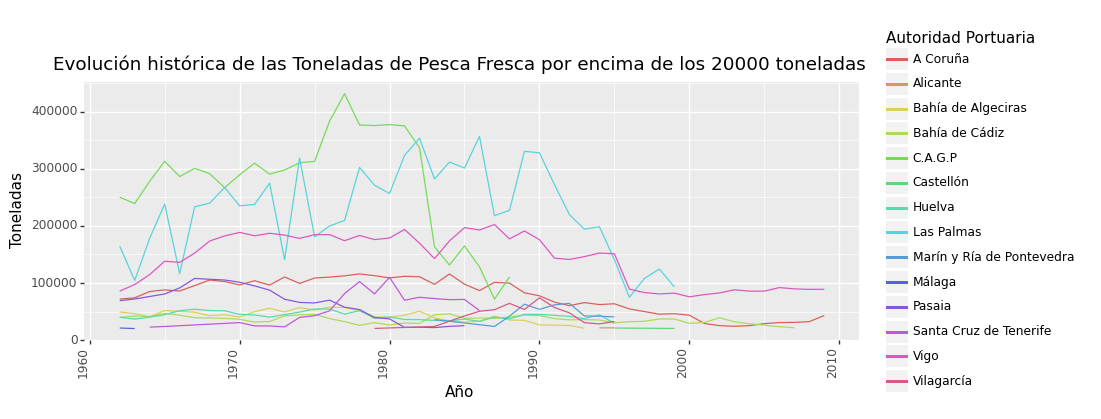

<ggplot: (8752366200089)>

In [30]:
(ggplot(df_puertos[df_puertos['Pesca Fresca'] >= 20000], 
        aes('Año','Pesca Fresca', color = 'Autoridad Portuaria'))
 + geom_line()
 + labs(title='Evolución histórica de las Toneladas de Pesca Fresca por encima de los 20000 toneladas', y = 'Toneladas')
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3))

###### Conclusiones
A nivel nacional y escogiendo aquellos puertos que han movido más de 20000 toneladas en algún año, observamos que durante casi dos décadas el puerto de las Palmas fue el puerto español que más pescado fresco movía, y a lo largo de su historía siempre estuvo en el top 3, junto con el puerto de C.A.G.P y el de Vigo.

##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos
- Mapeo de la variable Buques con estética normal, ya que vamos a dedicar un gráfico a cada Autoridad Portuaria. Utilizaremos el mapeo de la variable Año para el eje X.
- Selección de gráfico de líneas utilizando geom_point para visualizar mejor la evolución histórica
- Utilización de la capa facet_wrap para cambiar datos de 1D a 2D y poder dedicar una gráfica a cada Puerto
- Utilización de la capa labs para añadir Título al gráfico
- Utilizamos la capa theme para ajustar el ángulo de las etiquetas del eje x y ajustar el tamaño de la gráfica, así como el ratio Altura/Anchura.

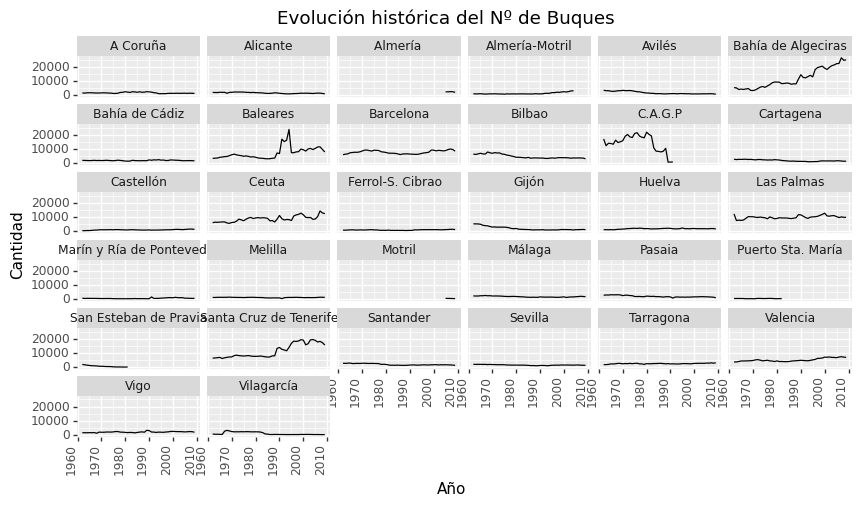

<ggplot: (8752364573705)>

In [31]:
# Realizamos una comparativa del nº histórico de buques en cada
# puerto
# ===========================================================
(ggplot(df_puertos, 
        aes('Año','Buques'))
 + geom_line()
 + facet_wrap('Autoridad Portuaria')
 + labs(title='Evolución histórica del Nº de Buques  ', y ='Cantidad')
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3))

##### Conclusiones
Observamos que el puerto de Santa Cruz de Tenerife ha exprimentado un grandísimo crecimiento en los últimos 20 años en cuanto a movimiento de buques, que lo han catalpultado a rozar los 20000 buques, y sólo superado en los últimos años por el puerto de la Bahía de Algeciras. Las Palmas se ha mantenido muy estable. También observamos que hay puertos bastantes recientes como el de Motril o Almería o por contrario algunos que han cesado su actividad como el Puerto de Sta. María o el de C.A.g.p

###### Para la realización del siguiente gráfico primero hemos calculado la media de la canitdad de barcos para Mercancía General para todos los años, y a continuación nos hemos dispuesto a realizar un gráfico de barras para mostrar la media histórica de cada puerto.

##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos
- Mapeo de la nueva variable que hemos creado,'Media de Toneladas de Mercancía General', para el eje Y, con estética por defecto, y mapeamos la  variable Autoridad Portuaria para para el eje X.
- Seleción de gráfico de barras, que no un histograma, utilizando geom_col para visualizar y comparar de una mejor forma las diferentes medias de cada puerto
- Utilización de la capa labs para añadir Título al gráfico
- Utilizamos la capa theme para ajustar el ángulo de las etiquetas del eje x y ajustar el tamaño de la gráfica, así como el ratio Altura/Anchura.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


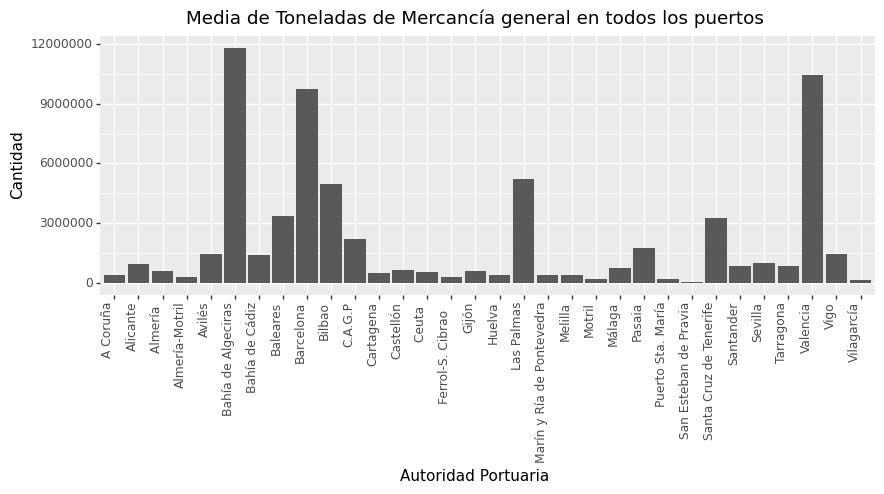

<ggplot: (8752363556293)>

In [32]:
# https://realpython.com/ggplot-python/
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html#two-variable-bar-plot

# Creamos un dataset con los datos sobre los que queremos calcular
# la media
# ===========================================================
df_test_1 = df_puertos[['Año', 'Mercancía General', 'Autoridad Portuaria']]
df_test_1.head()

# Agrupamos por autoridad portuaria y calculamos la media
# ===========================================================
means = df_test_1.groupby('Autoridad Portuaria').mean()
means['Autoridad Portuaria'] = means.index
# means.head()


# Realizamos el gráfico de las medias de cada puerto 
# cantidad de toneladas en toda su historia
# ===========================================================
(ggplot(means, 
        aes('Autoridad Portuaria','Mercancía General'))
 + geom_col()
#  + facet_wrap('Autoridad Portuaria')
 + labs(title='Media de Toneladas de Mercancía general en todos los puertos', y ='Cantidad')
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3))

###### Conclusiones
La media de toneladas de Mercancía General de los puertos nos da una idea bastante fiel a los que son los puertos más importantes de España, destacando los 3 más importanes, el de la Bahía de Algeciras,Valencia, Barcelona y en un escalón por debajo, Bilbao, Las Palmas y Santa Cruz de Tenerife.